# Homework 4 - Assignment: High Frequency Words
###### Stefano Biguzzi, Ian Costello, Dennis Pong

## Assignment Description

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## Assignment Steps

### Library and Setup

In [1]:
from urllib import request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from scipy import stats
%matplotlib inline

### 1. Corpus of Interest: "Habeas Corpus" (a pun for legal purposes)

For this assignment, we decided to use Project Gettenberg, a open source library for public domain books. We selected a corpus more or less randomly: "The Common Law" by Oliver Wendel Holmes Jr., who would (21 years later) become a Supreme Court Justice. It is of particular interest to select a non-fiction book to see how it does or does not comport with Zipf's law. This is a fairly technical and even arcane book, polar oppisites of a Jane Austin work.

In [2]:
# https://blog.ekbana.com/pre-processing-text-in-python-ad13ea544dae

url = 'https://www.gutenberg.org/files/2449/2449.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)
len(raw)
raw[:75]

'The Project Gutenberg EBook of The Common Law, by Oliver Wendell Holmes, Jr'

### Text Pre-Processing

We found a [very helpful and detailed blog](https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/) post of text pre-processing using nltk. It walked through each element to prepare text for analysis. This corpus need some considerable work smooth it out:

1. Eliminating all capital letters and testing output
2. Eliminating all numerics using a clever .join()
3. Stripping our all punctuation, some nltk tokenizers will not eliminate ", . ;"
4. Tokenizing the text
5. Eliminating english language "stop words," common words that would create considerable static for the analysis (e.g., "the," "a," "and," "or")

In [3]:
# 1. All words lowercase

def to_lower(text):
    return ' '.join([w.lower() for w in word_tokenize(text)])

raw = to_lower(raw)
raw[:75]

'the project gutenberg ebook of the common law , by oliver wendell holmes , '

In [4]:
# 2. Remove numbers 

raw = ''.join(c for c in raw if not c.isdigit())
raw[:705]

'the project gutenberg ebook of the common law , by oliver wendell holmes , jr . this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever . you may copy it , give it away or re-use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.org title : the common law author : oliver wendell holmes , jr. release date : december ,  [ etext #  ] last updated : july  ,  language : english character set encoding : ascii * * * start of this project gutenberg ebook the common law * * * produced by stuart e. thiel the common law by oliver wendell holmes , jr . conventions : numbers in square brackets ( e.g . [  ] ) refer'

In [5]:
# 3. Remove punctuation

def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

raw = strip_punctuation(raw)
raw[:705]

'the project gutenberg ebook of the common law  by oliver wendell holmes  jr  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever  you may copy it  give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at wwwgutenbergorg title  the common law author  oliver wendell holmes  jr release date  december    etext    last updated  july    language  english character set encoding  ascii    start of this project gutenberg ebook the common law    produced by stuart e thiel the common law by oliver wendell holmes  jr  conventions  numbers in square brackets  eg      refer to original page numbers  original f'

In [6]:
# 4. Tokenize

word_tokens = word_tokenize(raw)
word_tokens[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'common',
 'law',
 'by',
 'oliver']

In [7]:
# 5. Remove English stop words

stop_words = set(stopwords.words('english'))
clean_word_list = [w for w in word_tokens if not w.lower() in stop_words]
clean_word_list[:10]

['project',
 'gutenberg',
 'ebook',
 'common',
 'law',
 'oliver',
 'wendell',
 'holmes',
 'jr',
 'ebook']

### 2. Unique Words in the Corpus

As stated in the text pre-processing. We are defining unique words as all words in the corpus, excluding English stop words identified in the the nltk package. We decided not to lemmatize the corpus because in law, words that may appear similar have different effects or are treated differently, so it is important for this corpus to keep them distinct.  

In this corpus there are 8,216 unique words and a total of 62,795. The total words are kept as floats for purposes later on in the assignment. 

In [8]:
word_dist = nltk.FreqDist(clean_word_list)
unique_words = len(set(word_dist))

total_words = float(len(clean_word_list))
print("Unique Words:",unique_words, "| Total Words:",total_words)

Unique Words: 8216 | Total Words: 62795.0


#### Corpus Data Frames

For ease of use in the analysis, particularly in graphing, the processed word lists (dictionaries to be precise) were transformed into pandas data frames. This made it very simple to add columns, and explore the sets.

Two data frames were constructed, one for the total corpus and another subsetted to the top 200 words. Take note that the second most common "word" is simply, "v." At first glance, one might think this to be a Roman numeral representing the number five and should be excluded in the pre-processing. Laws are often listed out with numerals; however, one would also assume i, ii, iii, iv, would also be as or likely more frequent. The "v" in this case is not a Roman numeral, but means "versus" to title different court cases (e.g., Marbury v. Madison). This seemed then like a very important addition, and so was included. 

Quick note: Some other examples or text pre-processing sought to use regular expressions to exclude punctuation by searching for one character expressions. That route would eliminate this key insight for this corpus and so was not used.

### 3. Unique words and Half the Corpus

From the above, 62,795 words exist in this corpus. Half of that is approximately 31,398. Adding the cumulative frequncy as a column and searching for the location where that value exists in the column yielded 384 rows.

This means that 384 unique words make up half of this corpus. 

In [9]:
word_df = pd.DataFrame(list(word_dist.items()),columns = ['Word', 'Frequency']).sort_values(by=['Frequency'],ascending=False)
word_df['Cumulative_Freq'] = word_df['Frequency'].cumsum()
word_df.loc[word_df['Cumulative_Freq'] <= 31398]

,Word,Frequency,Cumulative_Freq
4,law,804,804
3017,v,499,1303
346,case,479,1782
790,would,467,2249
203,one,434,2683
...,...,...,...
440,took,33,31247
824,came,33,31280
192,degree,33,31313
909,regarded,33,31346


### 4. Top 200 Words Identified

In [22]:
top_words = word_df[:200]
top_words['Rank'] = range(1, 1+len(top_words))
top_words['Zipf'] = 804 / top_words['Rank']
top_words

<ipython-input-22-500770052900>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_words['Rank'] = range(1, 1+len(top_words))
<ipython-input-22-500770052900>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_words['Zipf'] = 804 / top_words['Rank']


,Word,Frequency,Cumulative_Freq,Rank,Zipf
4,law,804,804,1,804.000000
3017,v,499,1303,2,402.000000
346,case,479,1782,3,268.000000
790,would,467,2249,4,201.000000
203,one,434,2683,5,160.800000
...,...,...,...,...,...
1405,others,57,23556,196,4.102041
2161,latter,56,23612,197,4.081218
4562,warranty,56,23668,198,4.060606
8049,gutenbergtm,56,23724,199,4.040201


#### Cumulative Frequencies

Below the cumulative plot the top 200 words illustrates how the corpus is made up, totaling to 23,779.

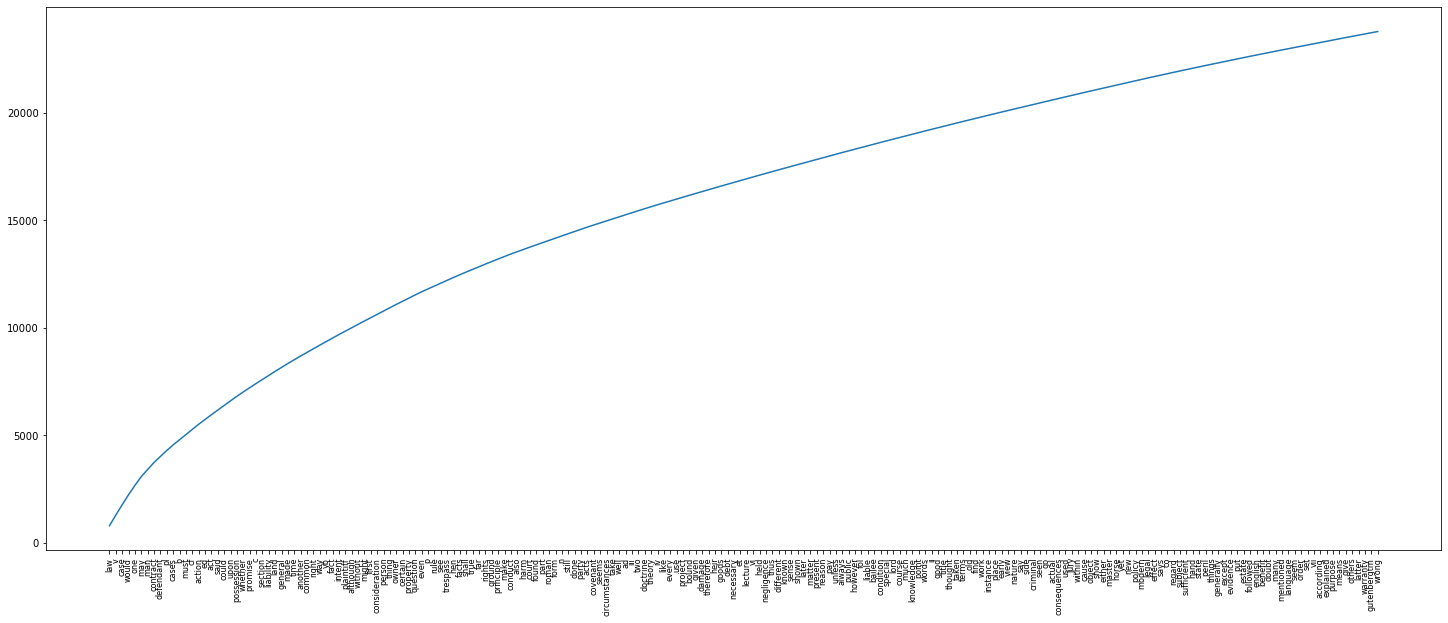

In [32]:
# https://python.gotrained.com/frequency-distribution-in-nltk/
x = top_words['Word']
y = top_words['Cumulative_Freq']

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)
plt.plot(x,y)
plt.show()


### 5. Relative Frequency of the Top 200 Words

Similarly, the relative frequency of the top 200 words below compares the frequency of a single word and the frequency of all words. The most used word in this corpus "law" appears as ~3.25% of the corpus.  

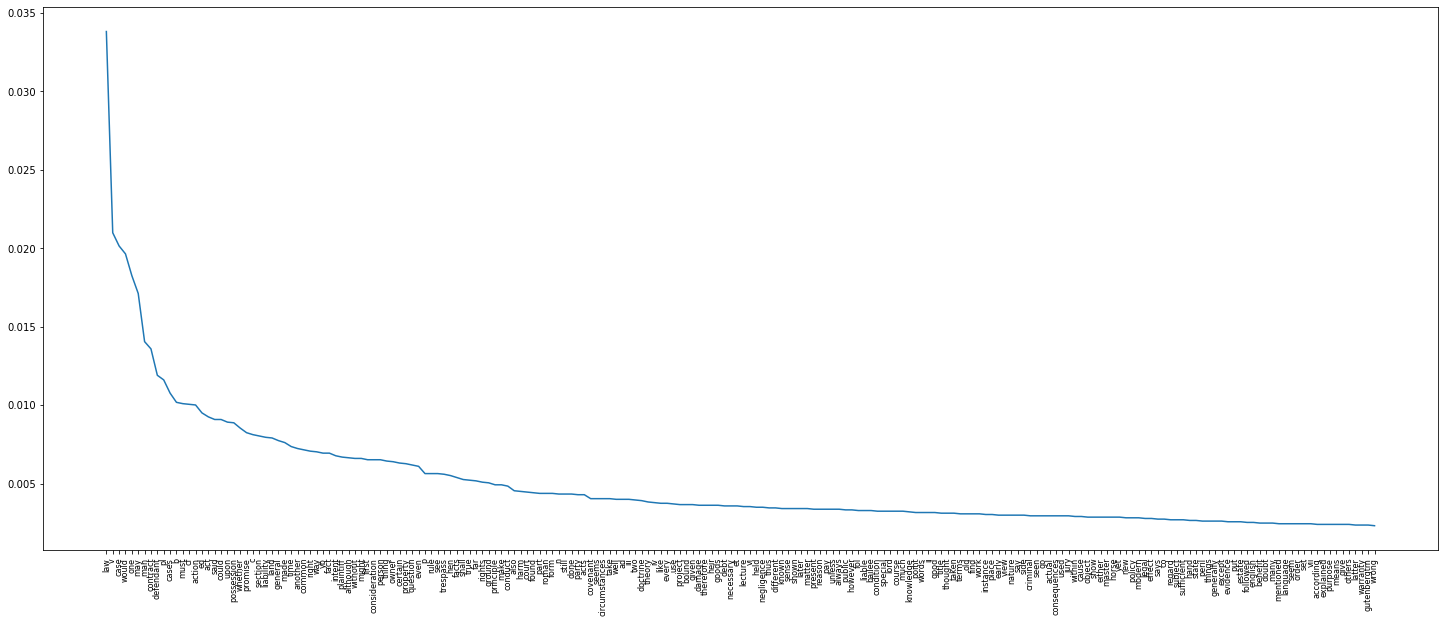

In [31]:
x = top_words['Word']
y = top_words['Frequency'] / 23779

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)
plt.plot(x,y)
plt.show()

### 6. Relative Frequency and Zipf's Law

"Zipf's Law describes how the frequency of a word in natural language, is dependent on its rank in the frequency table. So the most frequent word occurs twice as often as the second most frequent work, three times as often as the subsequent word, and so on until the least frequent word" [(Source)](https://www.sciencedaily.com/releases/2017/08/170810082147.htm).

Take note that in the data frame from the top word list there are two additional columns with their rank in the column and the theoretical frequency according to Zipf's law. 

Both distributions are shown below, in blue is the real data from our corpus and in orange is Zipf's Law theoretical distribution. The shape of our corpus is fairly faithful to the shape of Zipf's law, however the frequencies start to deviate substantially after the fifth or sixth word.   

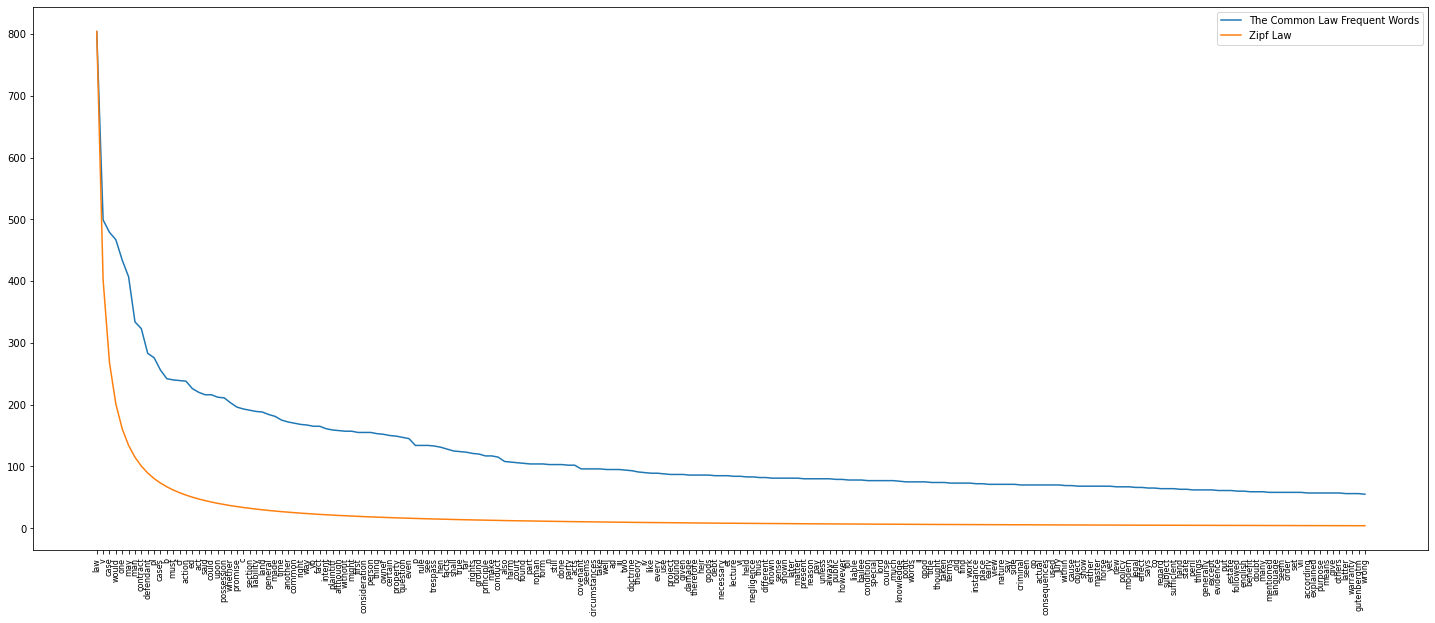

In [27]:
x = top_words['Word']
y = top_words['Frequency']
z = top_words['Zipf']

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)
plt.plot(x,y, label = 'The Common Law Frequent Words')
plt.plot(x,z, label = 'Zipf Law')
plt.legend(loc="upper right")
plt.show()

### 7. Corpus Differences from "All Words in All Corpora"

1. Time period of publishing and genre

Published in 1881, the book is reflective of the language of the time. Far enough from the modern era, these words are still all recognizable to modern readers, especially lawyers. Words like "law," "contract," "possession," and "action" have changed little from Justice Wendel Holmes Jr's time and indeed from the time of the Norman Conquest where much of common law derives. The words mortgage, attorney, jury, and culprit are all Norman words that have survived to the present day. 

2. Subject matter and changing nature of law

While these words have stood the test of time, the nature of American law especially is one of evolution, or as the then-future Justice put it, "the life of the law has not been logic: it has been experience." Legal books published today will likely have "law" and "v" as top words simply because case law is mode by which American law students learn about the law. The topics of 1881 American jurisprudence and today's or even 1800's would be very different. How states trade with each other, or antebellum legal fights about slavery, or today's battles on voting rights and LGBTQ equality. 

3. Author's idiosyncrasies

The author's style is something to note as a key difference. Every one write a little differently and lawyers select their language quite carefully as a general rule. It would stand to reason that there would be slight differences in this corpus than in other author's corpora. 

## YouTube Link

